In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
def recall(pattern,w, patterns):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    while True:   
        
        s = np.dot(w,pattern)
        s[s >= 0] = 1
        s[s < 0] = -1
        
        pattern=s
        

        
        count += 1  
        
        #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
        #plt.show()
        
        solved, ind = check_True(pattern, patterns)
        if solved:
            print ("It took:",count,"nr of iterations")
            plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            return ind
            
        elif np.array_equal(pattern,previousPattern):
            print("Local minimum found in iteration:",count)
            return -1
        previousPattern = np.copy(pattern)

def check_True(predicted_pattern, patterns):
    solved = False
    for i in range(len(patterns)):
        if np.array_equal(patterns[i],predicted_pattern):
            print("True! It matched pattern nr:",i)
            solved = True
    return solved, i

def init_weights_sparse(patterns):
    dim = patterns.shape[1] #X x N
    n = patterns.shape[0] #N
    w = np.zeros((dim, dim))
    ro = calc_ro(patterns)
    for i in range(n):
        w+= 1/dim*np.multiply.outer(patterns[i] - ro, patterns[i] - ro)
        
    return w

def init_weights2(patterns):
    dim = patterns.shape[1] #X x N
    n = patterns.shape[0] #N
    w = np.zeros((dim, dim))
    for i in range(n):
        w+= 1/dim*np.multiply.outer(patterns[i], patterns[i])
        
    return w

def calc_ro2(patterns):
    N = np.shape(patterns)[1]
    P = np.shape(patterns)[0]
    
    ro = 0
    for i in range(N):
        for mu in range(P):
            ro += (1/(N*P)) * patterns[mu, i]       
    return ro

def calc_ro(patterns):
    N = np.shape(patterns)[1]
    P = np.shape(patterns)[0]
    
    ro = 0
    for mu in range(P):
        pattern = patterns[mu]
        ro += (1/(N*P)) * np.sum(pattern)
    return ro

def sign(x):
    return (1, -1)[x < 0]

def sparse_update_rule(pattern, w, bias):
    dim = np.shape(pattern)[0]
    x = np.zeros(dim)
    for i in range(dim):
        sum1 = 0
        sum1 = sign(np.dot(w[i], pattern) - bias)
        #print("sign:", sum1)
        x[i] = 0.5 + 0.5 * sum1
    #plt.imshow(x.reshape(32,32),interpolation="nearest")
    #plt.show()
    return x

def update_rule(a, w):
    x = np.zeros(len(a))
    for i in range(len(a)):
        for j in range(len(a)):
            x[i] += w[i, j] * a[j]
    x = [sign(a) for a in x]
    return x

def check_converge(pattern, w, bias):
    new = sparse_update_rule(pattern, w, bias)
    if np.array_equal(pattern, new):
        return True
    return False

In [3]:
def sparse_patterns(num_pic, bias):
    patterns = []
    binar = (0, 1)
    for j in range(num_pic):
        vec = np.zeros(1024)
        for i in range(1024):
            rand_int = np.random.randint(0, 2)
            vec[i] = binar[rand_int]
        patterns.append(vec)
    return np.array(patterns)
    

In [4]:
def gen_sparse_patterns(nrOfPatterns, percentage):
    patterns = []
    dim = 1024
    
    
    for i in range(nrOfPatterns):
        pattern = np.zeros(dim)
        index = np.arange(dim)
        np.random.shuffle(index)

        abso = int(percentage*dim)
        flipIndex = index[:abso]

        flipped = np.copy(pattern)
        flipped[flipIndex] = 1

        patterns.append(flipped)
        
    #plt.imshow(patterns[0].reshape(32,32),interpolation="nearest")
    #plt.show()
    
    return np.array(patterns)

In [5]:
bias = 0.005
sparseness = 0.1
patterns = gen_sparse_patterns(40, 0.5)
w = init_weights_sparse(patterns[:3])

stable = check_converge(patterns[2], w, bias)
#recall(patterns[2], w, patterns[:3])
print("stable:", stable)

stable: True


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:82: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:82: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


Bias: 0.001


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


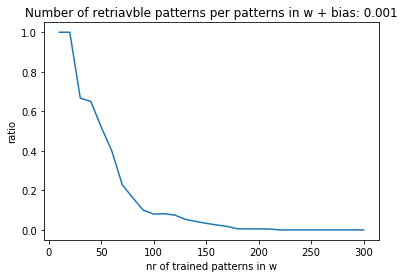

Bias: 0.01


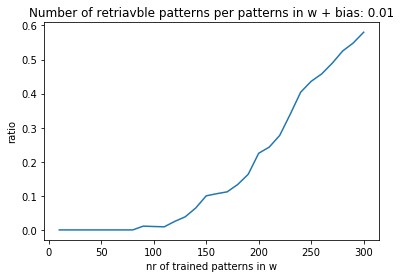

Bias: 0.02


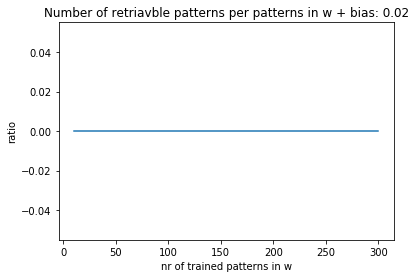

Bias: 0.03


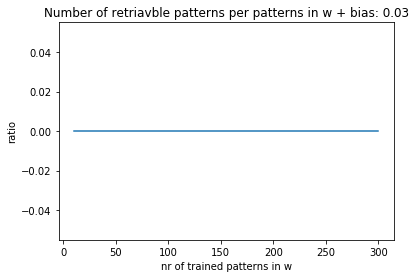

Bias: 0.04


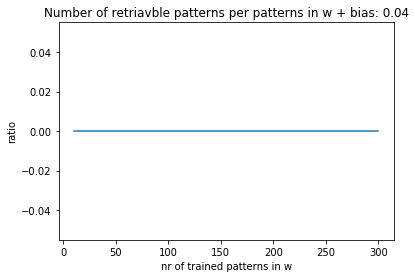

Bias: 0.05


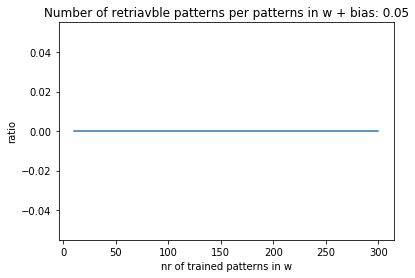

Bias: 0.06


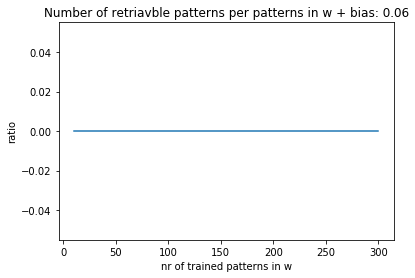

Bias: 0.07


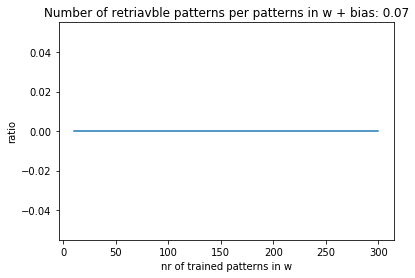

In [11]:
## Try generating sparse patterns with just 10% activity
## how many can be stored for different values of θ

biases = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
sparseness = 0.01
patterns = gen_sparse_patterns(300, sparseness)
#result = []
#w = init_weights_sparse(patterns)

for b in biases:
    result = []
    for i in range(0, 301, 10):
        count_stable = 0
        w = init_weights_sparse(patterns[:i])
        for p in patterns[:i]:
            stable = check_converge(p, w, b)
            if stable:
                count_stable += 1
        result.append(count_stable)
    print("Bias:", b)
    plt.plot(range(0, 301, 10), np.divide(result, range(0, 301, 10)))
    title = 'Number of retriavble patterns per patterns in w + bias: ' + str(b)
    name = 'bias' + str(b) + '.png'
    plt.xlabel('nr of trained patterns in w')
    plt.ylabel('ratio')
    plt.title(title)
    plt.savefig(name)
    plt.show()
    #result.append(count_stable, result)

#plt.plot(biases, result)
#plt.set_xscale('log')
#plt.xticks(biases)


